Занятие 7. Деревья решений.
===============

Полезные ссылки.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

http://scikit-learn.org/stable/modules/cross_validation.html<br>
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br>


## Деревья решений для задач классификации

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
#import os
#os.chdir("c:/aaa/temp_py/Shad_Python_08_2/")

Загружаем данные о выдаче кредита.
кредит -- решение о выдаче кредита (низкий или высокий), <br>
класс -- класс профессии (упорядоченный с точки зрения платёжеспособности),<br>
з\_плата -- способ выдачи зарплаты (ежемесячно или еженедельно),<br>
возраст -- разбитый по сегментам,<br>
кр\_карта -- есть или нет кредитная карта.<br>

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Credit.csv', encoding = 'windows-1251', sep=';')
data.head()

,кредит,клаcс,з_плата,возраст,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Правильный ответ записываем в вектор y
# Удаляем колонку с правильным ответом

y=data['кредит']
X = data.drop(['кредит'], axis=1)

In [7]:
data.head()

,клаcс,з_плата,возраст,кр_карта
0,2,2,2,1
1,2,1,2,0
2,4,1,1,1
3,2,2,2,0
4,3,2,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель



In [14]:
model = DecisionTreeClassifier(random_state=42,
                               criterion ='gini',
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=5,
                               class_weight=None,
#                                presort=False
)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [16]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call
import graphviz

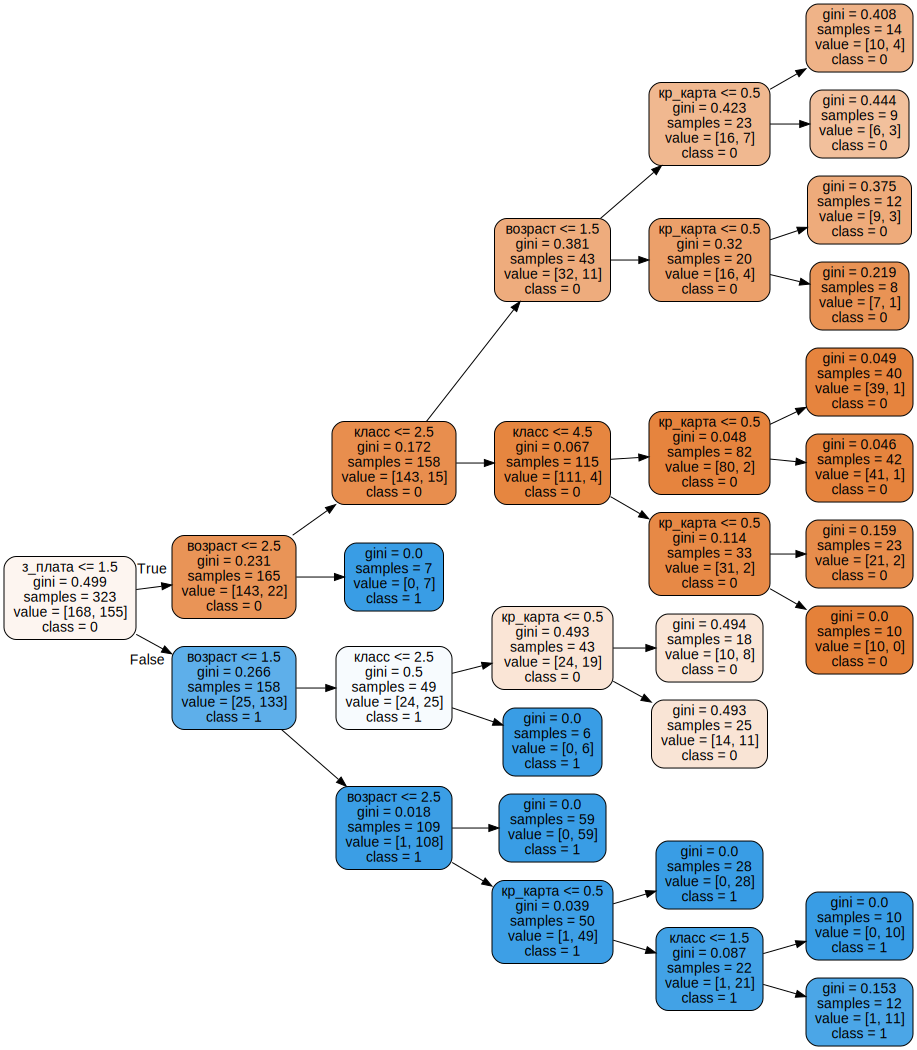

In [18]:
dot_data = export_graphviz(model, feature_names = X.columns,
                          class_names=list(map(str, y.index.to_list())),
                          rounded = True, filled=True, rotate=True)
graph = graphviz.Source(dot_data, format="png")
graph

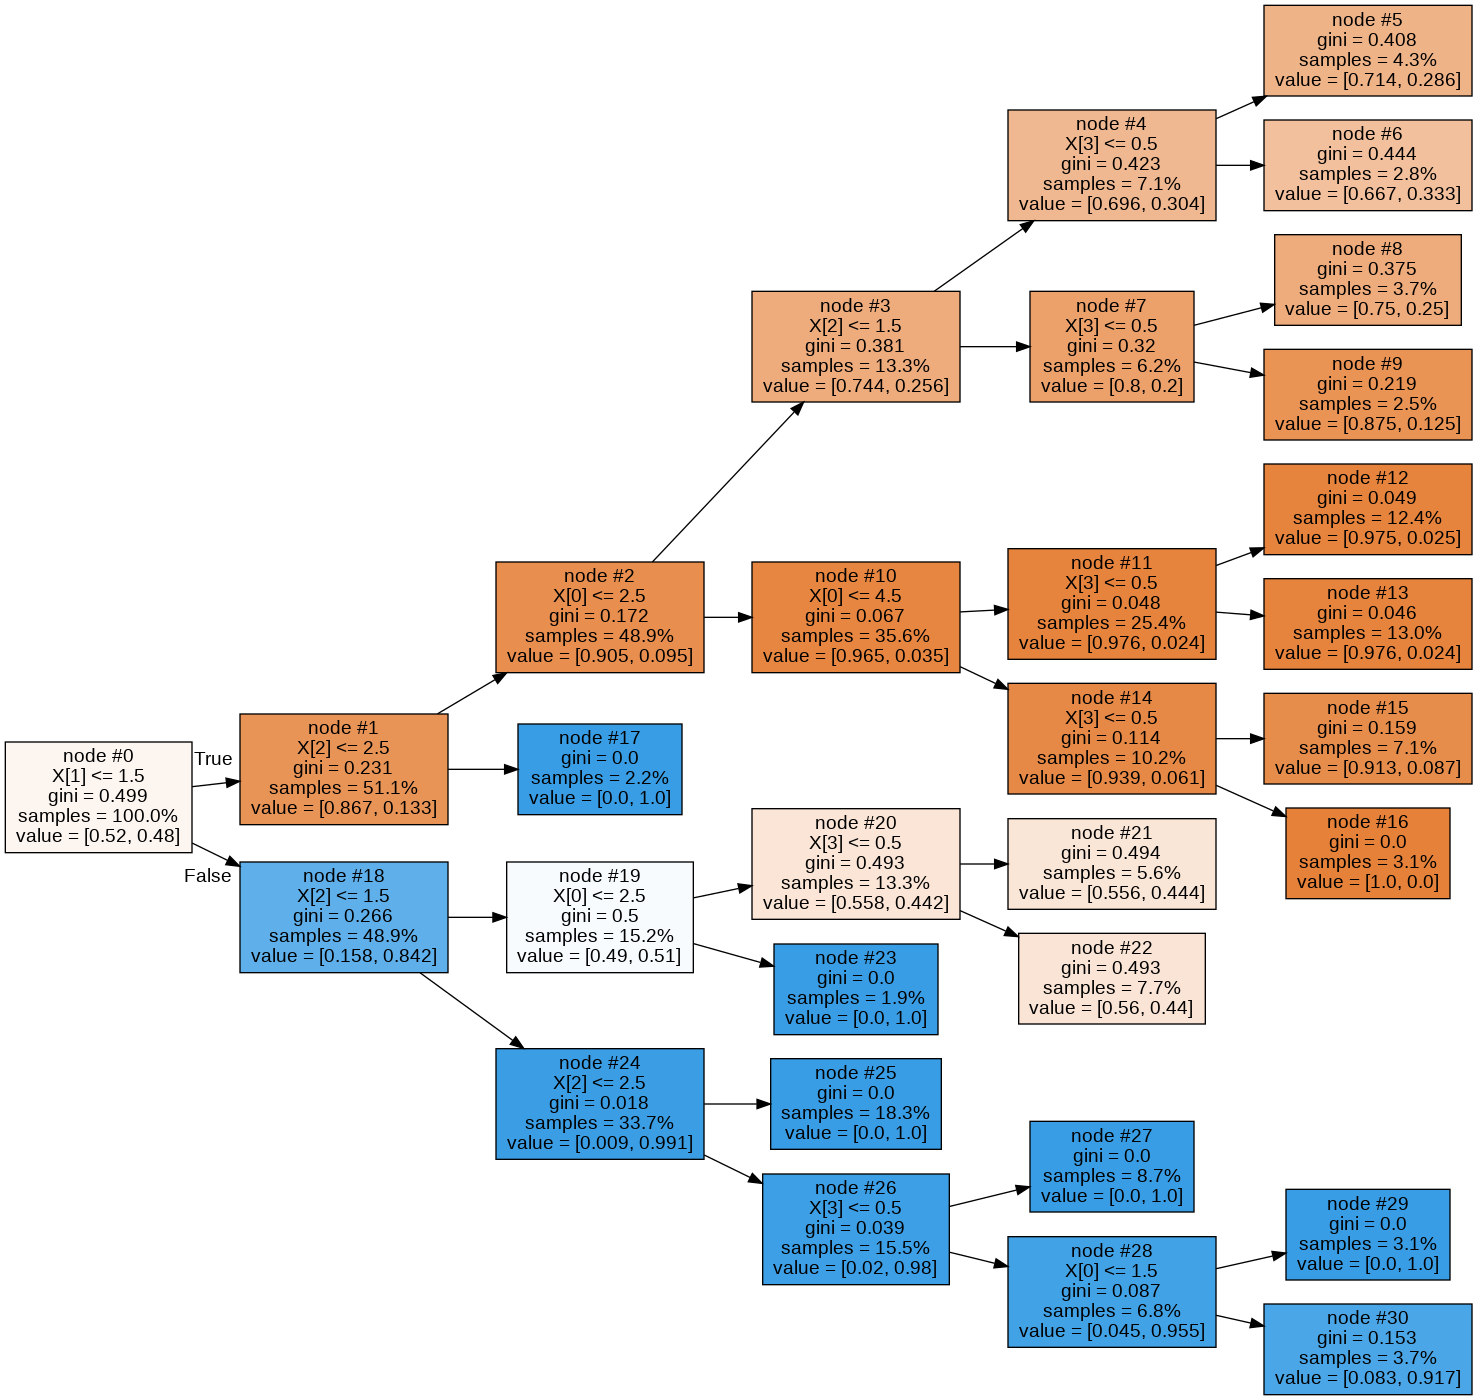

In [19]:
export_graphviz(model,
                out_file='tree.dot',
                class_names=None,
                label='all',
                filled=True,
                impurity=True,
                node_ids=True,
                proportion=True,
                rotate=True
                )

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
Image('tree.png')

Для интерпретации получившейся модели удобно изобразить её в виде дерева предикатов (решающих правил). Для этого в ```sklearn.tree``` предусмотрена функция ```export_graphviz```. Однако неудобство её в том, что она выдаёт результат в виде файла векторной графики ```.dot```, который нужно дополнительно преобразовать в привычный формат (например, в ```.png```).

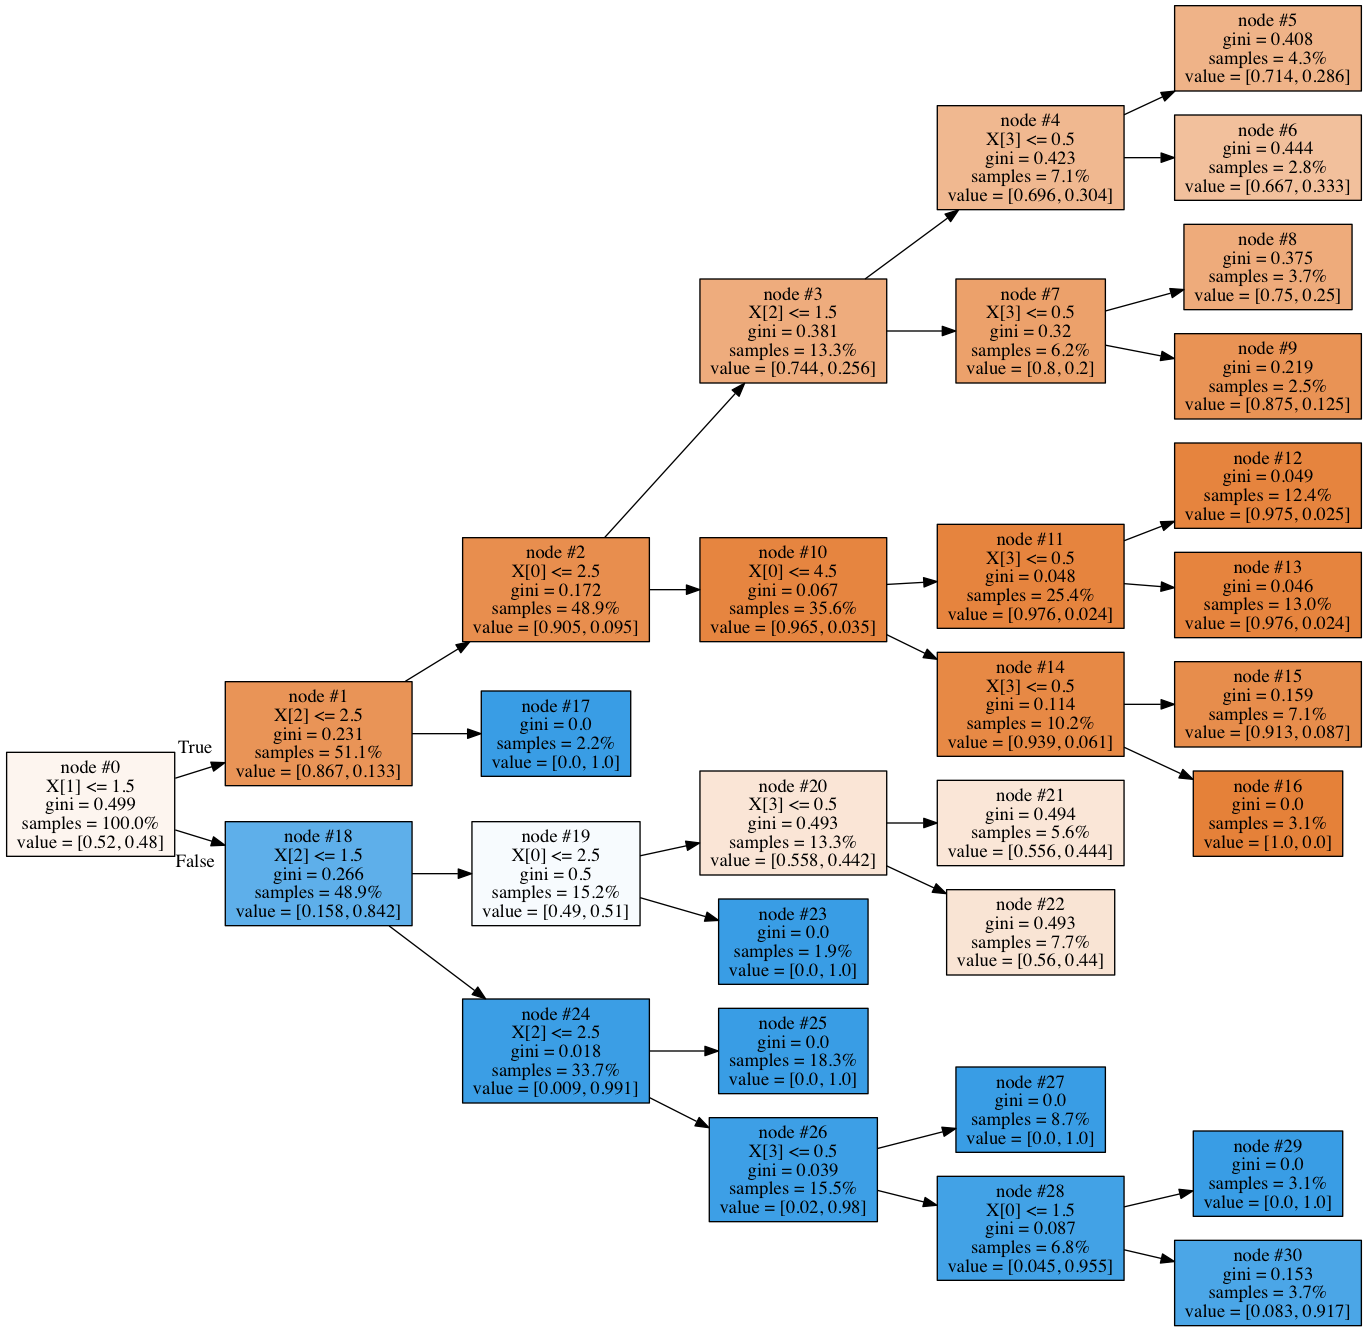

Модель позволяет оценить ценность каждой фичи в смысле её эффективности для разбиения (Gini importance). Эта оценка считает для каждой из фич сумму дельт по impurity (нормированную), полученных при разбиениях по этой фиче. Для этого у модели есть метод ```feature_importances_```.
'feature' преставляет собой заголовки столбцов, 'importance'- оценка эффективности разбиения (чему равна сумма?)

In [21]:
pd.DataFrame({'feature':X.columns,
              'importance':model.feature_importances_
              }).sort_values('importance', ascending=False)


,feature,importance
1,з_плата,0.706473
2,возраст,0.234163
0,клаcс,0.056472
3,кр_карта,0.002892


Как и ранее, у данной модели реализован метод ```predict```, который позволяет получить предсказания классов для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

array([0])

## Разбиение на обучающую и тестовую выборку

Данную модель мы обучили на всех имеющихся данных. С одной стороны это хорошо -- ведь мы использовали все имеющиеся данные, с другой стороны, это плохо с точки зрения оценки качества получившейся модели. Хорошо бы уметь его измерять. Оценка качества поможет нам улучшать текущую модель и сравнивать результаты с другими моделями. Хочется, чтобы у нас была отдельная тестовая выборка, на которой можно было бы проверять качество полученной модели. Ведь если взять любой пример из множества обучения, то модель даст на нём заведомо покажет себя хорошо -- она же его уже видела.

Для этого в процессе обучения данные разбивают на два множества -- обучающее (learn, train) и тестовое (test). В ```sklearn.model_selection``` для этого предусмотрена функция ```train_test_split```, необходимо подключить.

In [ ]:
from sklearn.model_selection import train_test_split



# обучаем модель на тренировочных данных


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
# Строим предсказание модели на тестовом множестве



## Оценка качества классификатора

Теперь нужно измерить качество предсказания. Зачастую для этого достаточно просто посчитать долю совпавших ответов в ```y_pred``` и ```y_test```. Но обычная точность даёт искажённые результаты в случае, когда в распределении классов имеется смещение. Например, если в бинарной классификации отношение классов 0/1 равно 90/10 и если у нас есть классификатор, который всегда отвечает 0, то тогда точность такой модели будет равна 0.9, что неоправданно высоко.

Чтобы избежать эти проблемы, надёжнее считать такие показатели как точность и полноту. Сначала построим матрицу ошибок $C = (c_{i,j})$, где $c_{i, j}$ -- количество элементов класса $i$, которым классификатор присвоил класс $j$. Для этого есть функция ```confusion_matrix``` в библиотеке ```sklearn.metrics```.

,0,1
0,27,3
1,10,25


Тогда по определению
<center>
```
TP (True Positive) = 25
TN (True Negative) = 27
FP (False Positive) = 3
FN (False Negative) = 10
```
</center>

$$
\begin{array}{сс}
Precision = \frac{TP}{TP + FP} &
Recall = \frac{TP}{TP + FN}\\
\end{array}
$$

Физический смысл точности -- доля правильно классифицированных положительных объектов среди всех положительных объектов, _определённых классификатором_. Физический смысл полноты -- доля правильно классифицированных положительных объектов среди всех _истинных положительных объектов_.

Но для полного счастья хочется иметь не два, а одно число, описывающее качество классификатора. Для этого используют функции семейства F-мер. Например, гармоническое среднее:

$$F1 = \frac{2\cdot Precision \cdot Recall}{Precision + Recall}.$$

Но бывает, что точность и полнота важны для качества классификации не в равных степенях. Например, если мы определяем рак по фотоснимкам тканей, то нам гораздо важнее полнота: если классификатор сработает ложно, то в таком случае мы назначим лечение здоровому человеку. А вот если классификатор пропустит у пациента заболевание, то лечение мы не назначим, и это скорее всего приведёт к гораздо более тяжёлым последствиям. Наоборот, если мы классифицируем спам, то нам, вероятно, точность более важна, чем полнота. Если мы пропустим спамное сообщение и пользователь его прочитает, то это всего лишь мелкое недоразумение. А если мы ошибочно посчитаем важное сообщение спамом и удалим его, это уже криминал.

Так вот, для балансировки между точностью и полнотой используется параметр $\beta$:
$$F = (\beta^2 + 1)\frac{Precision \cdot Recall}{\beta^2Precision + Recall}.$$
Если мы отдаём приоритет точности, то нужно выбирать $\beta\in (0, 1)$, если полноте, то $\beta > 1$. При $\beta=1$ получаем определённую выше F1-меру.

Точность, полноту и F1-меру можно посчитать при помощи встроенной функции ```sklearn.metrics.classification_report```.

             precision    recall  f1-score   support

          0       0.90      0.73      0.81        37
          1       0.71      0.89      0.79        28

avg / total       0.82      0.80      0.80        65



## Деревья решений для задач регрессии

С помощью деревьев можно решать не только задачу классификации, но и задачу регрессии. То есть когда отклик не дискретный, а непрерывный. Для таких задач реализован класс ```sklearn.tree.DecisionTreeRegressor```, и все шаги по созданию модели точно так же переносятся и на этот класс (даже названия методов одни и те же).

## Случайные леса

Настроим модель случайных лесов для наших данных.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       1.00      0.77      0.87        39
          1       0.74      1.00      0.85        26

avg / total       0.90      0.86      0.86        65



Видим, что по f1-скору случаный лес дал прирост в качестве с 0.80 до 0.86 по сравнению с одним решающим деревом.

Out-of-bag score: 0.875968992248


,feature,importance
1,з_плата,0.451255
2,возраст,0.421994
0,клаcс,0.109135
3,кр_карта,0.017616
